# Quantum Measurement and Uncertainty


### Peter Onyisi
<img src="images/texas_logo.png" width="400" align="left"/>

In [2]:
# TACC: install if necessary
try:
    import numba
except:
    ! pip3 install --user numba numpy==1.19.1 scipy==1.5.2 tqdm==4.48.2
    INSTALL_PATH='/home/jupyter/mydata/jupyter_packages/lib/python3.6/site-packages'
    import sys, os
    if os.access(INSTALL_PATH, os.R_OK) and INSTALL_PATH not in sys.path:
        sys.path.insert(0, INSTALL_PATH)

# generic
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['animation.embed_limit'] = 60
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['ytick.right'] = True
import math
import numpy
import scipy.integrate
import scipy.stats
import scipy.special
from matplotlib import animation

## "Measurement"

We need to bridge the picture of particles being described by wave functions with our macroscopic picture.  
* In the double slit experiment, when we try to detect the position of the particle at the end, we're going to observe it in a specific place, even though the wave function for the particle before the measurement may be distributed over a very large area.  
* If we measure the momentum of a particle, we will get a specific value even if the Fourier transform of the particle's wavefunction gives a significant spread in momentum values.

In the Copenhagen interpretation of quantum mechanics, we determine that the probability distribution function of observing a particle with wavefunction $\psi(x)$ at the position $x$ is given by $|\psi(x)|^2$. 
* If we make a Fourier transform of $\psi(x)$, we get a function $\tilde\psi(p)$ such that the probability of observing the particle with momentum $p$ is $|\tilde\psi(p)|^2$.

What does it mean to "observe" a particle? 
* Human-sized physicists, design experiments to ask questions of the quantum world. 
* Experiments should be repeatable: if I measure the position of a particle, and immediately after measure its position again, I should get the same answer, because there shouldn't have been enough time for it to move.
* If we measure the momentum of a particle twice in quick succession, we should get the same answer, as there won't have been enough time for the potential energy to change the momentum.  

We conclude that if the particle already has a wave function of definite position or definite momentum, then the measurements of the respective quantities will leave the wave function alone.
* However there's an important second conclusion: if the particle _isn't_ in a state with a definite value of the quantity being measured, then after the measurement by the appropriate apparatus, it will be.  
* For example, if a particle with definite momentum has its position measured, then the wave function after the measurement is one of definite position. (Of course, in the real world no detector has infinite resolution, so the "definite position" can only be approximate.)

## "Wave function collapse"

This phenomenon where the measurement changes the wave function is called "wave function collapse". 
* Experimental reality that measurements behave this way: the measurement changes the wave function. 
* In the Copenhagen interpretation this collapse is purely statistical in nature, i.e. absolutely nothing can predict what value you will observe in any given measurement beyond the probabilities given by the wave function.
* This means it's fundamentally different from evolution under Schr&ouml;dinger's equation: in that case the future evolution of the wave function is exactly defined and there are no probabilities.

The Copenhagen interpretation makes no claim as to what causes wave function collapse, or even where the boundary is between "quantum" behavior and "classical" measurement apparatus that cause the collapse. This is generally seen as an unsatisfactory state of affairs, but there is no generally-accepted resolution to this question. Since the Copenhagen interpretation gives results compatible with observation, we won't go into this any deeper, and postpone discussions to future classes.

## Position-Momentum Uncertainty

We have discussed that the kind of wave functions that have well-defined positions and those which have well-defined momenta are quite different:


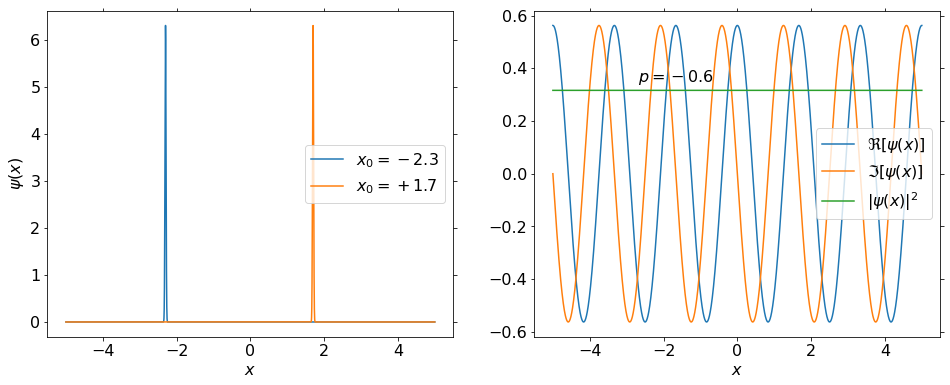

In [3]:
plt.subplots(1,2, figsize=(16,6))
plt.subplot(1,2,1)
# use a Gaussian approximation to a delta function at x_0
# normalization is appropriate for a wave function, differs from a normal Gaussian function!
def neardelta(x, x_0):
    SIGMA=0.01
    return (1/(2*math.pi*SIGMA**2)**.25)*numpy.exp(-(x-x_0)**2/(4*SIGMA**2))

xvals = numpy.linspace(-5, 5, 5000)
plt.plot(xvals, neardelta(xvals, -2.3), label='$x_0 = -2.3$')
plt.plot(xvals, neardelta(xvals, +1.7), label='$x_0 = +1.7$')
plt.ylabel('$\psi(x)$')
plt.xlabel('$x$')
plt.legend()

# plane wave
# normalization is OK for the range [-5,5]
# here we implicitly set h = 1
def mom(x, p):
    return (1/10**.25)*numpy.exp((1j*2*math.pi)*p*x)

plt.subplot(1,2,2)
plt.plot(xvals, mom(xvals, -0.6).real, label='$\Re[\psi(x)]$')
plt.plot(xvals, mom(xvals, -0.6).imag, label='$\Im[\psi(x)]$')
plt.plot(xvals, numpy.abs(mom(xvals, -0.6))**2, label='$|\psi(x)|^2$')
plt.xlabel('$x$')
plt.text(-2.7, 0.35, '$p=-0.6$')
plt.legend()
plt.show()

In fact in a sense they are the "most different" possible wave functions - completely localized in space versus completely spread out in space. Realistic wave functions are somewhere between the two, which mean they don't have perfectly defined position or momentum.  

We can characterize the uncertainty in the position and the momentum by taking the standard deviation of the probability density $|\psi(x)|^2$ for position or $|\tilde \psi(p)|^2$ for momentum (remember we get $\tilde \psi(p)$ by taking a Fourier transform).

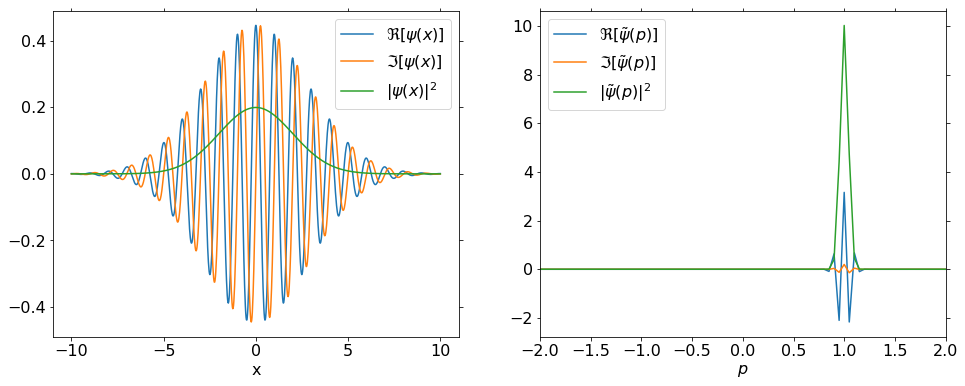

Standard deviation in position space: 1.999985487182913
Standard deviation in momentum space: 0.039788514178847
Standard deviation of product: 0.07957645091426556


In [43]:
def gaus_wavepacket(x, p, sigma):
    return (1/(2*math.pi*sigma**2)**.25)*numpy.exp(-x**2/(4*sigma**2))*numpy.exp(p*2*math.pi*1j*x)

xvals=numpy.linspace(-10,10,1000)
P=+1
SIGMA=2
packet = gaus_wavepacket(xvals, P, SIGMA)
plt.subplots(1,2, figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(xvals, packet.real, label='$\Re[\psi(x)]$')
plt.plot(xvals, packet.imag, label='$\Im[\psi(x)]$')
plt.plot(xvals, numpy.abs(packet)**2, label='$|\psi(x)|^2$')

plt.legend(loc='upper right')
plt.xlabel('x')
plt.subplot(1,2,2)
pvals=numpy.fft.fftshift(numpy.fft.fftfreq(xvals.size, d=xvals[1]-xvals[0]))
psip=numpy.fft.fftshift(numpy.fft.fft(packet)*(xvals[1]-xvals[0]))
plt.plot(pvals, psip.real, label=r'$\Re[\tilde\psi(p)]$')
plt.plot(pvals, psip.imag, label=r'$\Im[\tilde\psi(p)]$')
plt.plot(pvals, numpy.abs(psip)**2, label=r'$|\tilde\psi(p)|^2$')
plt.xlim(-2,2)
plt.xlabel('$p$')
plt.legend()
plt.show()

def pdfstd(x, pdf):
    intg = numpy.sum(pdf, dtype='float64')
    mean = numpy.sum(pdf*x, dtype='float64')/intg
    meansq = numpy.sum(pdf*x*x, dtype='float64')/intg
    return (meansq-mean)**.5

print('Standard deviation in position space:', pdfstd(xvals,numpy.abs(packet)**2))
print('Standard deviation in momentum space:', pdfstd(pvals,numpy.abs(psip)**2))
print('Standard deviation of product:', pdfstd(xvals,numpy.abs(packet)**2)*pdfstd(pvals,numpy.abs(psip)**2))

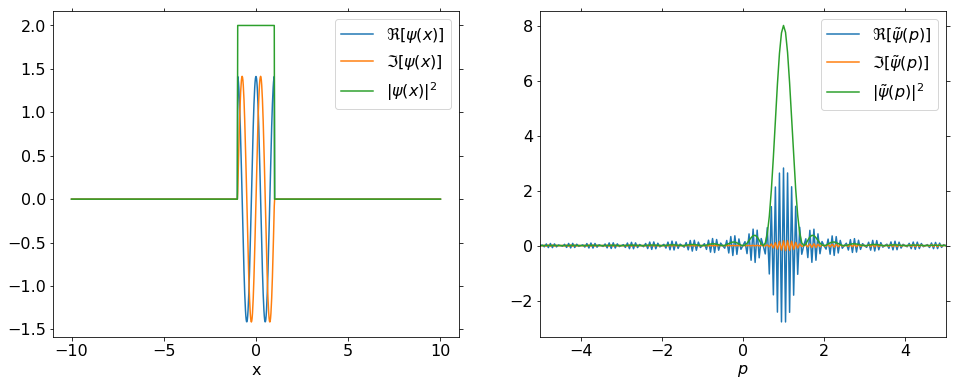

Standard deviation in position space: 0.5778993002546968
Standard deviation in momentum space: 1.3237021127536293
Standard deviation of product: 0.7649665247059861


In [44]:
def square_wave(x, p, width):
    f0 = numpy.zeros_like(x)
    f0[numpy.abs(x)<width/2]=width**.5
    return f0*numpy.exp(p*2*math.pi*1j*x)

xvals=numpy.linspace(-10,10,1000)
P=+1
WIDTH=2
packet = square_wave(xvals, P, WIDTH)
plt.subplots(1,2, figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(xvals, packet.real, label='$\Re[\psi(x)]$')
plt.plot(xvals, packet.imag, label='$\Im[\psi(x)]$')
plt.plot(xvals, numpy.abs(packet)**2, label='$|\psi(x)|^2$')

plt.legend(loc='upper right')
plt.xlabel('x')
plt.subplot(1,2,2)
pvals=numpy.fft.fftshift(numpy.fft.fftfreq(xvals.size, d=xvals[1]-xvals[0]))
psip=numpy.fft.fftshift(numpy.fft.fft(packet)*(xvals[1]-xvals[0]))
plt.plot(pvals, psip.real, label=r'$\Re[\tilde\psi(p)]$')
plt.plot(pvals, psip.imag, label=r'$\Im[\tilde\psi(p)]$')
plt.plot(pvals, numpy.abs(psip)**2, label=r'$|\tilde\psi(p)|^2$')
plt.xlim(-5,5)
plt.xlabel('$p$')
plt.legend()
plt.show()

def pdfstd(x, pdf):
    intg = numpy.sum(pdf, dtype='float64')
    mean = numpy.sum(pdf*x, dtype='float64')/intg
    meansq = numpy.sum(pdf*x*x, dtype='float64')/intg
    return (meansq-mean)**.5

print('Standard deviation in position space:', pdfstd(xvals,numpy.abs(packet)**2))
print('Standard deviation in momentum space:', pdfstd(pvals,numpy.abs(psip)**2))
print('Standard deviation of product:', pdfstd(xvals,numpy.abs(packet)**2)*pdfstd(pvals,numpy.abs(psip)**2))

As we reduce the position standard deviation, we increase the momentum standard deviation, and there might be some bound to how well we can constrain the combination of the two.  Heisenberg postulated such a constraint, and the following was proved by Kennard and Weyl:

$$ \sigma_x \sigma_{p_x} \ge \frac{\hbar}{2} = \frac{h}{4\pi} $$

In our units ($h=1$) then we should have $ \sigma_x \sigma_{p_x} \ge 1/4\pi \approx 0.07958$. 
* The Gaussian wavepacket meets this limit, while the product for the square wave is much bigger. 
* In general, Gaussian wavepackets are the only wave functions that "saturate" the limit (i.e., get the product as small as possible). This is the _Heisenberg Uncertainty Principle_ for position and momentum. 
* It is a general characteristic of waves (there's nothing particularly quantum mechanical about it); the same relation shows up when analyzing radio signals, for instance, saying that signals that are highly localized in time must have a broad distribution in frequency.

The main consequence of this is to confirm the effect we already saw with the wave function in the simple harmonic oscillator potential: the "ground state" wavefunction is not a spike at the bottom of the potential well, because such narrow position-space wave functions must have large spreads in momentum, hence large energy.

In more than one dimension, position and momentum are vector quantities. The uncertainty principle applies independently to each dimension. For example, in three dimensional space we get the following three relations:

$$ \begin{align*}
\sigma_{x}\sigma_{p_x} &\ge \frac{h}{4\pi}\\
\sigma_{y}\sigma_{p_y} &\ge \frac{h}{4\pi}\\
\sigma_{z}\sigma_{p_z} &\ge \frac{h}{4\pi}\\
\end{align*}
$$

Let's look at one consequence of the uncertainty principle: why it wasn't possible that nuclei just consisted of protons and electrons (as opposed to having a distinct neutral particle, the neutron). Nuclei have radii in the range $10^{-15}$ - $10^{-14}$ m.  If we take $3 \times 10^{-15}$ m as $\sigma_x$, then the uncertainty principle gives us

$$\begin{align*}
\sigma_{p_x} &\ge \frac{h}{4\pi \sigma_x} \\
&= 1.8 \times 10^{-20}\textrm{ kg m/s}
\end{align*}
$$

The kinetic energy for a particle of momentum $p = \sigma_{p_x}$ is $p^2/2m = \sigma_{p_x}^2/2m$. So this $\sigma_p$ corresponds to

$$\begin{align*}
E &= 1.7 \times 10^{-10}\textrm{ J} = 1.1\textrm{ GeV (electron)}\\
&= 9.2 \times 10^{-14}\textrm{ J} = 0.5\textrm{ MeV (proton)}
\end{align*}
$$

(all of this nonrelativistic, of course). The proton mass only corresponds to 0.94 GeV of energy via $E = mc^2$, so the kinetic energy of an electron confined to the volume of a nucleus would be larger than the mass of a proton! This would be a very large correction to the total mass of the nucleus, which is not seen. However confining a proton in the volume of a nucleus gives a kinetic energy much smaller than the proton mass, and can be accommodated by measurements.